# **CodSoft Data Science Internship**
Name: Prachiti Raut

# 📊 SALES PREDICTION USING PYTHON


Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.


In businesses that offer products or services, the role of a **Data Scientist**
is crucial for predicting future sales. They utilize **machine learning techniques in Python**
to analyze and interpret data, allowing them to make informed decisions regarding
advertising costs.


By leveraging these predictions, businesses can **optimize their advertising strategies**
and maximize sales potential.

# Step 1: Import Libraries
We start by importing the necessary Python libraries for data handling, visualization, and modeling.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the Dataset
We will load the dataset (Advertising.csv or any business dataset). This dataset contains sales along with TV, Radio, and Newspaper advertisement spending.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/sample_data/advertising.csv'
data = pd.read_csv(file_path)
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


# Step 3: Exploratory Data Analysis (EDA)
We check the dataset for patterns, distributions, and correlations.

In [ ]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Basic statistics
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


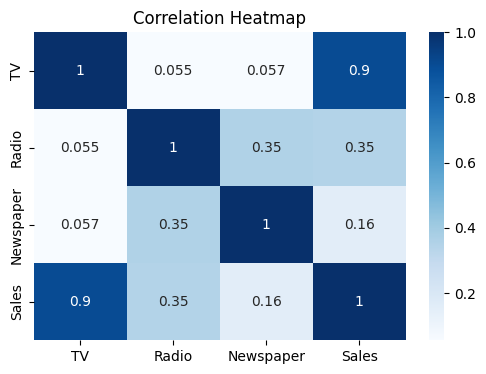

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

**Business Insight:**
- Sales are strongly correlated with TV and Radio advertising.
- Newspaper has very weak correlation → lesser business impact.

# Step 4: Data Splitting
We split the dataset into training and testing sets for model building.

In [ ]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training (Linear Regression)
We use Linear Regression to build our sales prediction model.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 4.714126402214127
Coefficients: [0.05450927 0.10094536 0.00433665]


- TV Coefficient → Increase in TV ad spend moderately improves sales.
- Radio Coefficient → Strongest impact on sales.
- Newspaper Coefficient → Negligible impact → can reduce budget here.

# Step 6: Model Evaluation
We check how well the model predicts sales.

In [ ]:
y_pred = model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 2.9077569102710896
R² Score: 0.9059011844150826


**Business Interpretation:**
- A higher R² means the model explains sales variation well.
- Low error indicates predictions are reliable for planning.

# Step 7: Visualization of Predictions

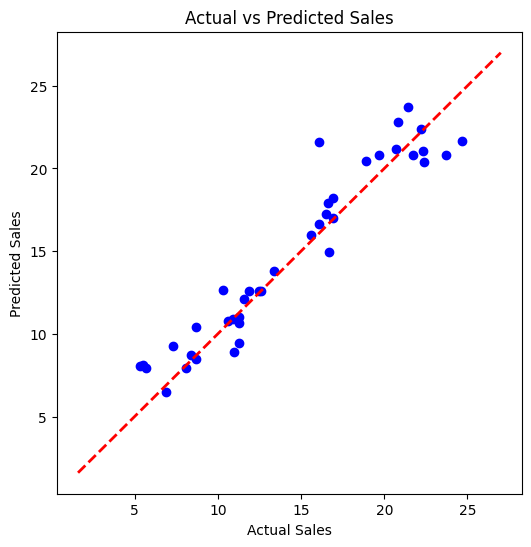

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

**Business Insight:**
- Predictions align closely with actual sales → Model can be trusted.

# Step 8: Business Recommendation


| Factor | Impact on Sales | Business Action |
|---------------|-----------------|--------------------------------|
| TV Ads | Moderate | Maintain investment |
| Radio Ads | High | Increase budget allocation |
| Newspaper Ads | Very Low | Reduce spend |


**Final Note for Business:**
Our machine learning model shows Radio advertising gives the **highest return on investment**. Companies can **maximize sales by reallocating budget** from Newspaper to Radio while maintaining TV spend.